# PART A: Model Code

In [3]:
import itertools
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from functools import reduce

def polynomialFeatures(X, degree = 1):
    polynomial_matrix = []
    try:
        combination = list(itertools.combinations_with_replacement(X, degree))
        for i in combination:
            polynomial_matrix.append(reduce(lambda x, y: x*y, i))
    except:
        for k in range(len(X)):
            combination = list(itertools.combinations_with_replacement(X[k], degree))
            newCombination = list(X[k])
            for i in combination:
                newCombination.append(reduce(lambda x, y: x*y, i))
                polynomial_matrix = newCombination.copy()
    return polynomial_matrix

In [ ]:
test = polynomialFeatures(np.array(X_train), 3)


from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(3) 
poly.fit_transform(X_train)

In [4]:
from statistics import mean 

def mse(Y_true, Y_pred):
    Y_true = np.array(Y_true)
    return mean(((Y_true[i] - Y_pred[i])**2) for i in range(len(Y_true)))

In [5]:
import math

def rmse(Y_true, Y_pred):
    return math.sqrt(mse(Y_true, Y_pred))

In [56]:
from math import sqrt
import matplotlib.pyplot as plt

def partitionHelper(data,folds):
    return np.array_split(data, folds)

def cross_val(model, X, y, folds, learning_rate, epochs, tol, regularizer, lambd, **kwargs):
    partition = partitionHelper(np.array(X),folds)
    labels_partition = partitionHelper(np.array(y),folds)
    a2 = []
    
    prediction = []
    all_train_mse = []
    all_train_rmse = []
    all_test_mse = []
    all_test_rmse = []
    
    for l in range(len(partition)-1):
        test_set = partition[l]
        test_label = labels_partition[l]
        train_set_unflattened = partition.copy()
        train_label_unflattened = labels_partition.copy()
        del train_set_unflattened[l]
        del train_label_unflattened[l]

        train_set = [y for x in train_set_unflattened for y in x]
        train_label = [y for x in train_label_unflattened for y in x]

        model.fit(train_set, train_label,learning_rate, epochs, tol, regularizer, lambd, **kwargs)
        
        #for k in range(len(partition[l])-1):
        #    prediction[k] = model.predict(partition[l][k])
        prediction_train = model.predict(train_set)
        prediction_test = model.predict(test_set)
                
        all_train_rmse.append(rmse(train_label, prediction_train))
        all_train_mse.append(mse(train_label, prediction_train))

        
        all_test_rmse.append(rmse(test_label, prediction_test))
        all_test_mse.append(mse(test_label, prediction_test))
        
        
    return all_train_rmse, all_train_mse, all_test_rmse, all_test_mse


def our_learning_curve(model, X_lc, Y_lc, cv=5, train_size=1, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    iterations = int(len(X_lc) / train_size)
    curr_size = train_size
    
    training_rmse = []
    training_size = []
    validation_rmse = []
    
    training_mse = []
    validation_mse = []
    
    for i in range(iterations - 1):
        
        #curr_fold = curr_fold + remain_data[:train_size]
        training_size.append(curr_size)
        
        curr_fold = X_lc[:curr_size]
        remain_data = X_lc[curr_size:]
        
        curr_fold_label = Y_lc[:curr_size]
        remain_label = Y_lc[curr_size:]
        
        train_rmse_val, train_mse_val, test_rmse_val, test_mse_val = cross_val(model, curr_fold, curr_fold_label, cv, learning_rate, epochs, tol, regularizer, lambd, **kwargs)
        
        training_rmse.append(np.mean(train_rmse_val))
        training_mse.append((-1) * train_mse_val)
#         prediction = model.predict(remain_data)
        validation_rmse.append(np.mean(test_rmse_val))
        validation_mse.append((-1) * np.mean(test_mse_val))
        
        curr_size = curr_size + train_size
        
#     plt.figure(figsize=(10, 6))
#     plt.plot(training_size, training_mse, "r-+", linewidth=3, label="Training Score")
#     plt.plot(training_size, validation_mse, "b-", linewidth=2, label="Cross-validation Score")
#     plt.legend(loc="best", fontsize=14)   
#     plt.xlabel("Training set size", fontsize=14) 
#     plt.ylabel("Negative MSE", fontsize=14) 
#     plt.title("Learning Curve")
#     plt.show()
        
    plt.figure(figsize=(10, 6))
    plt.plot(training_size, training_rmse, "r-+", linewidth=3, label="Training Score")
    plt.plot(training_size, validation_rmse, "b-", linewidth=2, label="Cross-validation Score")
    plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 
    plt.title("Learning Curve")
    plt.show()

    return training_rmse, validation_rmse

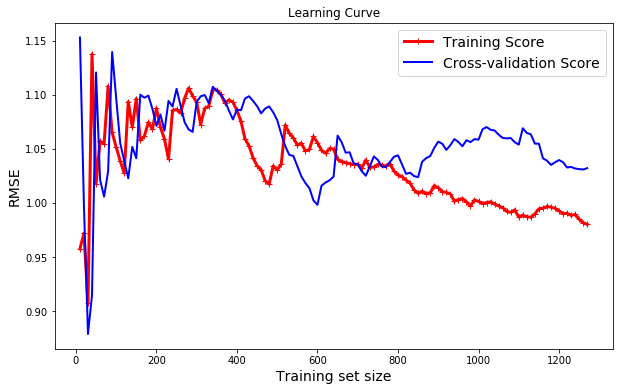

([0.9574963617050741,
  0.9720726505408342,
  0.9073176458595865,
  1.137736181058914,
  1.0176779781688168,
  1.056998908083246,
  1.0549671950169506,
  1.1079315112474808,
  1.0652049902196061,
  1.051587313517608,
  1.0388860339738673,
  1.0276431306009965,
  1.093715858011759,
  1.070165287724172,
  1.0966407264346278,
  1.05789823944866,
  1.0616932404328516,
  1.0746162629831806,
  1.0683784726690804,
  1.0876362464788207,
  1.0699961394787199,
  1.0590716864940535,
  1.0405732846218192,
  1.0856906566332043,
  1.0864858360964154,
  1.083154971579747,
  1.0967757991447822,
  1.1062803420707747,
  1.099077599476106,
  1.093309574959009,
  1.0725678084693597,
  1.0875997685647658,
  1.0895004881872086,
  1.1046575214839662,
  1.1045705409359896,
  1.1004860199957336,
  1.0923387069462847,
  1.0952898638413249,
  1.0931825941047333,
  1.0856128062025912,
  1.0755736374031815,
  1.0592895591440792,
  1.052779844075609,
  1.0417820332957093,
  1.034451809968751,
  1.0307966916967657,


In [57]:
model = Linear_Regression()
our_learning_curve(model, X_train, y_train, 5, 10, tol=0.01)

## 4. Extra Credit



In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    
    
    # RMSE vs. Degree Curve

    degreeList = list(range(1, maxPolynomialDegree + 1))

    mse_train, mse_test = [], []

    for degree in degreeList:
        
        X_poly = polynomialFeatures(np.array(X), degree)
        Y_poly = polynomialFeatures(np.array(Y), degree)
        
        train_rmse, train_mse, test_rmse, test_mse = cross_val(model, X_poly, Y_poly, cv, learning_rate, epochs, tol, regularizer, lambd, **kwargs)
    
        mse_train.append(train_mse)
        mse_test.append(test_mse)
        
        
        
    plt.figure(figsize=(10, 6))   
    plt.plot(degreeList, np.sqrt(mse_test), "ro-", alpha=1.0, linewidth=1.0, label="Test RMSE")
    plt.plot(degreeList, np.sqrt(mse_train), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")    
    plt.legend(loc="best", fontsize=14) 
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.title("RMSE for Varying Degree")
    plt.show()

    
    return

In [28]:
regression = Linear_Regression()
plot_polynomial_model_complexity(regression, X_train, y_train, 3, 3)

IndexError: index 427 is out of bounds for axis 0 with size 427

In [ ]:
import numpy as np

class Linear_Regression:
    theta = 0
    
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
        prev_tol = 1
#         print(X)
        try:
            m = X.shape[1]
        except:
            m = len(np.array(X_train)[0])
        
        if type(X) is list:
            X = np.array(X)
        
        theta_hat = np.zeros(m).reshape(-1,1)
#         print("theta_hat \n", theta_hat)
#         self.theta = theta_hat
#         precision = 0.001
        theta_hat = theta_hat.T[0]

        for i in range(epochs):

            y_hat = np.matmul(X,theta_hat)
            error = mse(Y, y_hat)
#             print("error", error)

            #Check 57 Gradient Descent 
            if regularizer == 'l1':
                theta_hat = np.subtract(np.subtract(theta_hat, (learning_rate/m) * np.dot(X.T, np.subtract(y_hat, Y))), learning_rate * lambd * theta_hat/np.sign(m))
            elif regularizer == 'l2':
                theta_hat = np.subtract(np.subtract(theta_hat, (learning_rate/m) * np.dot(X.T, np.subtract(y_hat, Y))), learning_rate * lambd * theta_hat/m)

            else:
                theta_hat = np.subtract(theta_hat, (learning_rate/m) * np.dot(X.T, np.subtract(y_hat, Y)))
            #print(theta_hat)

#             print("theta_hat \n", theta_hat)
            y_hat_update = np.matmul(X,theta_hat)
#             print("y_hat_update \n", y_hat_update)
            new_error = mse(Y, y_hat_update.T)
            #print("new_error", new_error)

#             print("prev_tol", prev_tol)

            self.theta = theta_hat
            
            if tol is not None and new_error > error - tol:
                break

        return
    
    def predict(self, X):
        return np.matmul(X, self.theta)# 1D array of predictions for each row in X, The 1D array should be designed as a column vector.
    
    def __init__(self):
        pass

In [18]:
lin_regression = Linear_Regression()
lin_regression.fit(X_train, y_train, tol=0.01, lambd=0.01, regularizer='l2')

lin_regression.predict(X_test)

array([5.21872397, 5.11967237, 5.01505473, 5.65447271, 5.21872397,
       5.21753374, 4.52196335, 4.49831884, 4.6241066 , 6.17628122,
       4.24469491, 6.17628122, 4.76505918, 5.603079  , 6.09398423,
       6.16136637, 6.25707121, 5.41446854, 4.59306231, 5.0897052 ,
       5.48265697, 5.96330112, 4.61123411, 4.32779421, 5.05443756,
       4.0731929 , 4.36036991, 4.61123411, 5.02699871, 4.7830612 ,
       4.95690306, 5.5672015 , 4.91690707, 6.09914745, 4.17393787,
       5.14884035, 5.61240737, 4.81675273, 4.97561369, 5.95880317,
       5.95880317, 5.17696178, 5.37679696, 5.77826656, 4.61605683,
       6.69275398, 5.77155312, 5.05222362, 4.07912212, 4.24926486,
       4.65581934, 4.2945494 , 4.20238458, 5.1797879 , 4.92448903,
       5.13814061, 4.89251303, 5.8686309 , 5.60924422, 4.79708123,
       5.70955474, 5.454526  , 4.90497821, 5.02456884, 5.21453368,
       5.21453368, 4.91785619, 5.22105986, 6.28520128, 5.41464957,
       4.71794148, 5.02732896, 4.99267557, 5.08387397, 6.18599

In [19]:
lin_regression = Linear_Regression()
lin_regression.fit(X_train, y_train, tol=0.01, lambd=0.01, regularizer='l1')

lin_regression.predict(X_test)

array([5.21825191, 5.11926948, 5.01463635, 5.65413232, 5.21825191,
       5.21706353, 4.52160054, 4.4978313 , 4.62368923, 6.17577846,
       4.24434853, 6.17577846, 4.76449925, 5.60259627, 6.09365792,
       6.16103052, 6.25656421, 5.4140558 , 4.59271866, 5.08937555,
       5.48225451, 5.9627991 , 4.61085419, 4.32749402, 5.05396774,
       4.07280406, 4.35998745, 4.61085419, 5.02654117, 4.78259541,
       4.95643475, 5.5666179 , 4.91654487, 6.09877427, 4.17355212,
       5.14842669, 5.61182822, 4.81635809, 4.97506492, 5.95830458,
       5.95830458, 5.17662444, 5.37627818, 5.77769664, 4.61558691,
       6.691724  , 5.77118485, 5.05186045, 4.07874653, 4.24891054,
       4.65549789, 4.29411452, 4.20195341, 5.17948056, 4.92407452,
       5.13774961, 4.89223303, 5.86826065, 5.60874783, 4.7966693 ,
       5.709137  , 5.45417656, 4.90454678, 5.02410351, 5.21398231,
       5.21398231, 4.91740229, 5.22046865, 6.28467254, 5.41407214,
       4.71754088, 5.02694718, 4.99229493, 5.08351666, 6.18559

In [11]:
lin_regression = Linear_Regression()
lin_regression.fit(X_train, y_train, tol=0.01, lambd=0.01)

lin_regression.predict(X_test)

array([5.21876689, 5.119709  , 5.01509276, 5.65450365, 5.21876689,
       5.21757649, 4.52199634, 4.49836317, 4.62414455, 6.17632693,
       4.2447264 , 6.17632693, 4.76511009, 5.60312289, 6.09401389,
       6.1613969 , 6.2571173 , 5.41450606, 4.59309355, 5.08973517,
       5.48269356, 5.96334676, 4.61126866, 4.32782149, 5.05448027,
       4.07322825, 4.36040468, 4.61126866, 5.02704031, 4.78310355,
       4.95694564, 5.56725456, 4.91694   , 6.09918137, 4.17397294,
       5.14887796, 5.61246003, 4.8167886 , 4.97566359, 5.9588485 ,
       5.9588485 , 5.17699244, 5.37684413, 5.77831838, 4.61609955,
       6.69284764, 5.77158659, 5.05225663, 4.07915627, 4.24929707,
       4.65584857, 4.29458894, 4.20242378, 5.17981584, 4.92452672,
       5.13817616, 4.89253848, 5.86866456, 5.60928935, 4.79711868,
       5.70959272, 5.45455776, 4.90501744, 5.02461115, 5.21458381,
       5.21458381, 4.91789745, 5.22111362, 6.28524935, 5.41470207,
       4.7179779 , 5.02736367, 4.99271018, 5.08390645, 6.18603

# Part B: Data Processing

In [1]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', delimiter=",")
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


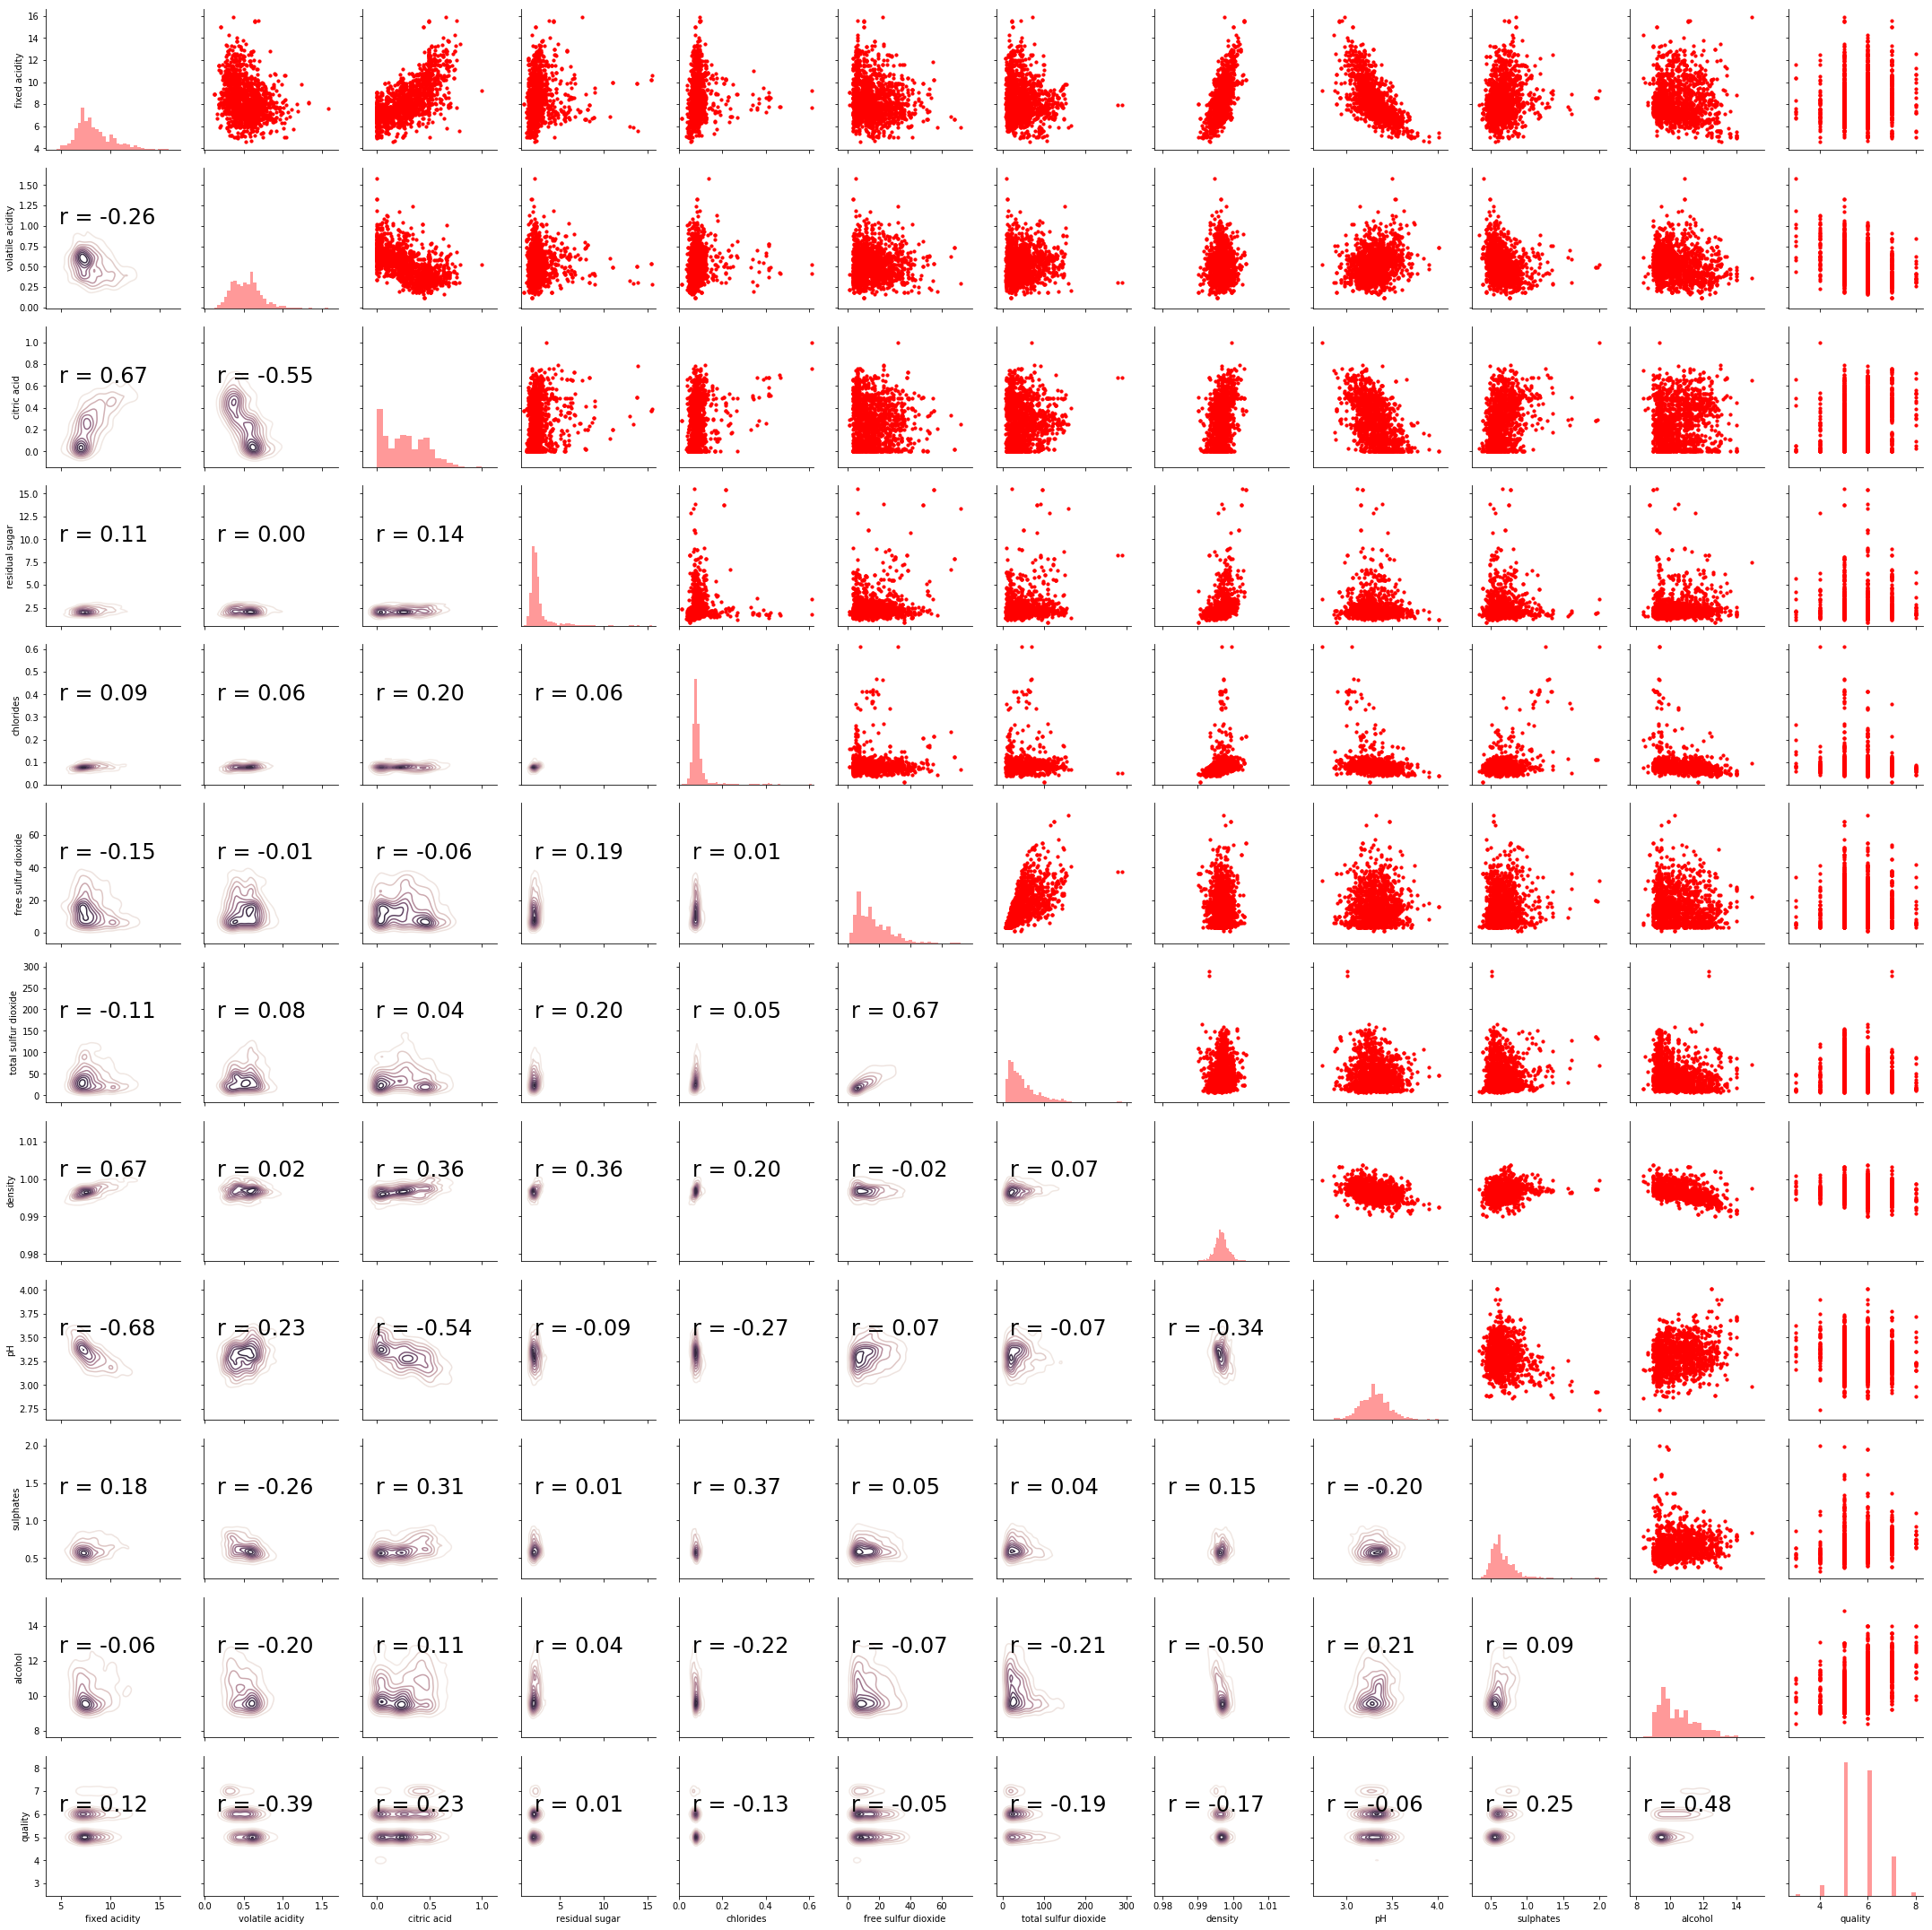

In [28]:

shuffle = df.sample(frac=1)

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [47]:
def partition(X, y,t):
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    
    return X_train, y_train, X_test, y_test

X = df.drop(columns='quality')
y = df['quality']
X_other = X
y_other = y

X = (X - X.min())/ (X.max() - X.min())
# X = (X - X.mean())/X.std()
X.insert(0,'bias',0)

X_train, y_train, X_test, y_test = partition(X, y, 0.2)


# Part C: Model Evaluation

In [43]:
def cross_val_kfold(model, X, y, folds, learning_rate, regularizer, lambd, **kwargs):
    
    partition = partitionHelper(np.array(X),folds)
    labels_partition = partitionHelper(np.array(y),folds)
    a2 = []
    epochs = 1000
    tol = 0.01
    
    prediction = []
    all_train_mse = []
    all_train_rmse = []
    all_mse = []
    
    for l in range(len(partition)-1):
        test_set = partition[l]
        test_label = labels_partition[l]
        train_set_unflattened = partition.copy()
        train_label_unflattened = labels_partition.copy()
        del train_set_unflattened[l]
        del train_label_unflattened[l]

        train_set = np.array([y for x in train_set_unflattened for y in x])
        train_label = np.array([y for x in train_label_unflattened for y in x])

        model.fit(train_set, train_label,learning_rate, 1000, tol, regularizer, lambd, **kwargs)
        
        #for k in range(len(partition[l])-1):
        #    prediction[k] = model.predict(partition[l][k])
        prediction = model.predict(test_set)
    
        error = mse(prediction, train_label)
        all_mse.append(error)
            
    return {'average_error': all_mse, 'pred': prediction, 'labels': test_label}

def kFold(model, X, Y, cv, model_args, error_function, **kwargs):

    accuracyMatrix = []

    learning_rates = model_args[0]
    regularizers =  model_args[1]
    lambdas = model_args[2]
    total_cross_val = []
    total_arguments = []
    
    all_runs = []
    
    for i in learning_rates:
        #a = []
        #cross_val_a = []
        #argument_a = []
        for j in regularizers:
            for k in lambdas:
                a2 = cross_val_kfold(model, X, Y, cv, i, j, k, **kwargs)
                total_cross_val.append(a2)
                accuracyMatrix.append(mean(a2['average_error'])/len(a2['average_error']))
                total_arguments.append([i,j,k])
                all_runs.append([i,j,k,mean(a2['average_error'])/len(a2['average_error']),a2['average_error']])
    
    index_i = 0
    minAccuracy = accuracyMatrix[0]
    for i in range(len(accuracyMatrix)):
        if(minAccuracy > accuracyMatrix[i]):
            minAccuracy = accuracyMatrix[i]
            index_i = i

    print("Min Error Function:", minAccuracy)
    print("Maximizing argument")
    print("Learning rates: ", total_arguments[index_i][0])
    print("Regularizers: ", total_arguments[index_i][1])
    print("Lambda: ", total_arguments[index_i][2])
    #print("Everything else: ", total_cross_val[index_i])

    return all_runs

In [44]:
lambdas = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rates = [1.0, 0.1, 0.01, 0.001, 0.001]
regularizers = ['l1', 'l2']
linearmodel = Linear_Regression()

kFold(linearmodel, X, y, 3, [learning_rates, regularizers, lambdas], mse)

Min Error Function: 0.5885297303905128
Maximizing argument
Learning rates:  0.01
Regularizers:  l1
Lambda:  1.0


[[1.0, 'l1', 1.0, 110694.98279181702, [224268.0098587469, 218511.9213085212]],
 [1.0, 'l1', 0, 110694.98279181702, [224268.0098587469, 218511.9213085212]],
 [1.0, 'l1', 0.1, 110694.98279181702, [224268.0098587469, 218511.9213085212]],
 [1.0, 'l1', 0.01, 110694.98279181702, [224268.0098587469, 218511.9213085212]],
 [1.0,
  'l1',
  0.001,
  110694.98279181702,
  [224268.0098587469, 218511.9213085212]],
 [1.0,
  'l1',
  0.0001,
  110694.98279181702,
  [224268.0098587469, 218511.9213085212]],
 [1.0, 'l2', 1.0, 110694.98279181702, [224268.0098587469, 218511.9213085212]],
 [1.0, 'l2', 0, 110694.98279181702, [224268.0098587469, 218511.9213085212]],
 [1.0, 'l2', 0.1, 110694.98279181702, [224268.0098587469, 218511.9213085212]],
 [1.0, 'l2', 0.01, 110694.98279181702, [224268.0098587469, 218511.9213085212]],
 [1.0,
  'l2',
  0.001,
  110694.98279181702,
  [224268.0098587469, 218511.9213085212]],
 [1.0,
  'l2',
  0.0001,
  110694.98279181702,
  [224268.0098587469, 218511.9213085212]],
 [0.1, 'l1',

In [13]:
# Stochastic GD

import numpy as np

class SGD:
    theta = 0
    
    def fit(self, X, Y, batch_size=10, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
        prev_tol = 1
        
        m = X.shape[1]
        
        theta_hat = np.zeros(m).reshape(-1,1)

        theta_hat = theta_hat.T[0]

        for i in range(epochs):          
            replace = np.random.choice(X.shape[0], batch_size, replace=False)
            X_batch = np.array(X)[replace]
            Y_batch = np.array(Y)[replace]         

            y_hat = np.matmul(X_batch,theta_hat)
#             print("This is y \n", y)
#             print("This is y_hat \n", y_hat)
#             print("y_hat size \n", len(y_hat))
            error = mse(Y_batch, y_hat)
#             print("error", error)
            
            if regularizer == 'l1':
                theta_hat = np.subtract(np.subtract(theta_hat, (learning_rate/m) * np.dot(X_batch.T, np.subtract(y_hat, Y_batch))), learning_rate * lambd * theta_hat/np.sign(m))
            elif regularizer == 'l2':
                theta_hat = np.subtract(np.subtract(theta_hat, (learning_rate/m) * np.dot(X_batch.T, np.subtract(y_hat, Y_batch))), learning_rate * lambd * theta_hat/m)
            else:
                theta_hat = np.subtract(theta_hat, (learning_rate/m) * np.dot(X_batch.T, np.subtract(y_hat, Y_batch)))

#             print("theta_hat \n", theta_hat)
            y_hat_update = np.matmul(X_batch,theta_hat)
#             print("y_hat_update \n", y_hat_update)
            new_error = mse(Y_batch, y_hat_update.T)
            #print("new_error", new_error)

#             print("prev_tol", prev_tol)

            self.theta = theta_hat
            
            if tol is not None and new_error > error - tol:
                break

        return
    
    def predict(self, X):
        return np.matmul(X, self.theta)# 1D array of predictions for each row in X, The 1D array should be designed as a column vector.
    
    def __init__(self):
        pass

In [21]:
sgd_model = SGD()
sgd_model.fit(X_train, y_train, tol=0.01, regularizer='l2')

sgd_model.predict(X_test)

# print(len(X_test))
# print(len(y_test))

# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_prediction, color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())

# plt.show()

array([3.88841797, 3.88916006, 3.78138948, 4.45835003, 3.88841797,
       3.89013427, 3.43153675, 3.23836768, 3.44675026, 4.68467653,
       3.21432666, 4.68467653, 3.37394439, 4.21610375, 4.84470095,
       4.89077502, 4.75300899, 4.14504087, 3.52275501, 3.98305734,
       4.22444105, 4.50300936, 3.49171436, 3.35054222, 3.75278203,
       3.01234892, 3.2720332 , 3.49171436, 3.7406552 , 3.51733994,
       3.66410471, 4.0350268 , 3.77482483, 4.78661881, 3.10746418,
       3.90726227, 4.0865012 , 3.65145669, 3.56840245, 4.50272367,
       4.50272367, 4.03997952, 3.96581358, 4.24430856, 3.36852022,
       4.41043684, 4.51344907, 3.90546898, 3.03796663, 3.21804068,
       3.6090347 , 3.13843681, 3.06387964, 4.08497935, 3.70893722,
       3.9268365 , 3.87828318, 4.58806495, 4.19703569, 3.61342929,
       4.39960006, 4.26771042, 3.67531956, 3.72742237, 3.77383036,
       3.77383036, 3.65506724, 3.72716172, 4.74791981, 3.91341118,
       3.5505906 , 3.84728372, 3.81804172, 3.93193924, 4.82980